In [1]:
import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
%matplotlib inline

In [2]:
# Constants
hbar = 1.054571817*10**(-34)  # Reduced Planck's constant [J*sec] - DO NOT CHANGE
m = 9.1093837*10**(-31)       # Mass of electron [kg]             - DO NOT CHANGE
k_B = 1.380649*10**(-23)      # Boltzmann constant [J/K]          - DO NOT CHANGE
T_H, T_C = 100, 1             # Tempertaures of Cold and Hot reservoirs [K] - Change at will
w = 5e13                      # Frequency [1/sec] - Arbitrary constant in this calculation

In [3]:
# Parameters
L = 0.0000001         # Maximum length of problem [m]
N = 1000              # Number of grid points

In [4]:
# Grid points
x = np.linspace(-L, L, N)
dx = x[1] - x[0]
T = np.linspace(T_C, T_H, N)
dT = T[1] - T[0]

In [6]:
# Potential energy - Change function according to given potential
V = lambda l, temp: 5e-5*temp*l**2
V_H = V(x, T_H)
V_C = V(x, T_C)

In [7]:
def calculate_efficiency(V):
    
    # Kinetic energy matrix (finite difference method)
    global K
    K = np.zeros((N, N))
    coeff = -hbar**2 / (2 * m * dx**2)
    for i in range(N):
        if i > 0:
            K[i, i-1] = coeff
        K[i, i] = -2 * coeff
        if i < N - 1:
            K[i, i+1] = coeff
            
    # Potential energy matrixes (diagonal)
    V_matrix = np.diag(V(x,T))
    V_H_matrix = np.diag(V_H)
    V_C_matrix = np.diag(V_C)
    
    # Hamiltonian matrixes
    H = K + V_matrix
    H_C = K + V_C_matrix
    H_H = K + V_H_matrix
    
    # Solve the eigenvalue problem
    global eigenvalues
    global eigenvectors
    global E_n_H
    global E_n_C
    global wave_functions_H
    global wave_functions_C
    eigenvalues, eigenvectors = eigh(H)
    E_n_H, wave_functions_H = eigh(H_H)
    E_n_C, wave_functions_C = eigh(H_C)
    
    # Calculate the partition functions
    beta_H = 1 / (k_B * T_H)
    Z_H = np.sum(np.exp(-beta_H * E_n_H))
    beta_C = 1 / (k_B * T_C)
    Z_C = np.sum(np.exp(-beta_C * E_n_C))
    
    # Calculate Boltzmann probabilities
    global p_H
    global p_C
    p_H = np.exp(-beta_H * E_n_H) / Z_H
    p_C = np.exp(-beta_C * E_n_C) / Z_C
    
    # Calculate heat absorbed and released
    Q_H = np.sum(E_n_H * (((np.exp(-(1/(k_B*T_H))*E_n_H))/Z_H) - ((np.exp(-(1/(k_B*T_C))*E_n_C))/Z_C)))
    Q_C = np.sum(E_n_C * (((np.exp(-(1/(k_B*T_C))*E_n_C))/Z_C) - ((np.exp(-(1/(k_B*T_H))*E_n_H))/Z_H)))
    
    # Calculate Efficiency
    efficiency = (Q_C + Q_H)/Q_H
    
    # Calculate Carnot's efficiency
    carnot_efficiency = 1 - T_C / T_H
    
    # Calculate ratio between efficiencies
    global etta
    etta = efficiency/carnot_efficiency
    
    # Print results
    print(f"Efficiency of the quantum heat engine: {efficiency:.4f}")
    print(f"Efficiency of Carnot's engine under the same circustances: {carnot_efficiency:.4f}")
    print(f"The ratio between the Quantum Heat Engine's efficiency and Carnot's efficiency is: {etta:.4f}")
    
    return efficiency
    

In [8]:
calculate_efficiency(V)

Efficiency of the quantum heat engine: 0.8996
Efficiency of Carnot's engine under the same circustances: 0.9900
The ratio between the Quantum Heat Engine's efficiency and Carnot's efficiency is: 0.9087


0.899587828706963

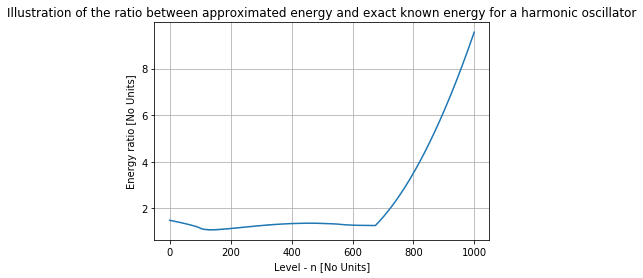

Efficiency of the quantum heat engine: 0.9000
Efficiency of Carnot's engine under the same circustances: 0.9900
The ratio between the Quantum Heat Engine's efficiency and Carnot's efficiency is: 0.9091


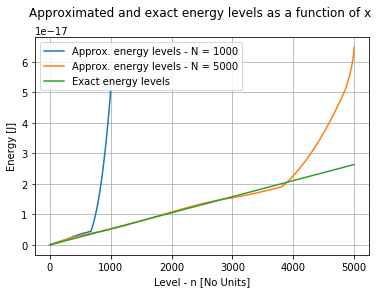

In [9]:
# Test section - Analytic Harmonic Oscillator energy levels compared to approximated by us

E_n_func = lambda n, w: hbar * w * (n + 1/2)
E_n_exact = np.array([E_n_func(i, w) for i in range(N)])

E_n_ratio = eigenvalues / E_n_exact
E_n_H_ratio = E_n_H / E_n_exact
E_n_C_ratio = E_n_C / E_n_exact

plt.plot([i for i in range(N)], E_n_ratio)
plt.title('Illustration of the ratio between approximated energy and exact known energy for a harmonic oscillator')
plt.xlabel('Level - n [No Units]')
plt.ylabel('Energy ratio [No Units]')
plt.grid()
plt.show()

plt.plot([i for i in range(N)], eigenvalues, label='Approx. energy levels - N = 1000')

N = 5000
x = np.linspace(-L, L, N)
dx = x[1] - x[0]
T = np.linspace(T_C, T_H, N)
dT = T[1] - T[0]

V = lambda l, temp: 5e-5*temp*l**2
V_H = V(x, T_H)
V_C = V(x, T_C)

calculate_efficiency(V)

E_n_exact = np.array([E_n_func(i, w) for i in range(N)])

E_n_ratio = eigenvalues / E_n_exact
E_n_H_ratio = E_n_H / E_n_exact
E_n_C_ratio = E_n_C / E_n_exact


plt.plot([i for i in range(N)], eigenvalues, label='Approx. energy levels - N = 5000')

plt.plot([i for i in range(N)], E_n_exact, label='Exact energy levels')
plt.title('Approximated and exact energy levels as a function of x \n')
plt.xlabel('Level - n [No Units]')
plt.ylabel('Energy [J]')
plt.legend()
plt.grid()
plt.savefig('energylevels_comparison.tiff', dpi=400)
plt.show()

In [10]:
# Reproduction of plot 4.3 from the book

T_test = np.linspace(2, T_H, N)

# Calculate partition function of specific temperature
def partition_function(E_n, T):
    beta = 1 / (k_B * T)
    Z = np.sum(np.exp(-beta * E_n))
    return Z

# Calculate the expected energy value for energy levels vector and temperature
def average_energy(energy_levels, beta):
    Z = partition_function(energy_levels, beta)
    E_avg = np.sum(energy_levels * np.exp(-beta * energy_levels)) / Z
    return E_avg

# Calculate the heat capacity of a quantum engine
def heat_capacity(energy_levels, temperatures):
    betas = 1 / (k_B * temperatures)
    energies = np.array([average_energy(energy_levels, beta) for beta in betas])
    # Calculate the numerical derivative of energy with respect to temperature
    dE_dT = np.gradient(energies, temperatures)
    C_V = dE_dT / k_B
    return C_V

In [13]:
Cv = heat_capacity(E_n_H, T_test)

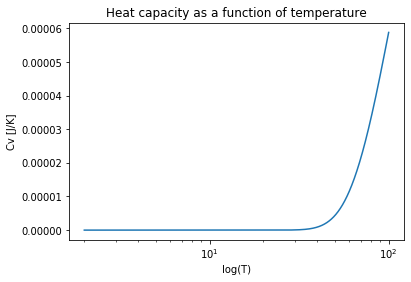

In [14]:
# Plot the results
plt.plot(T_test, Cv)
plt.xlabel('log(T)')
plt.ylabel('Cv [J/K]')
plt.title('Heat capacity as a function of temperature')
plt.xscale('log')
plt.show()